In [1]:
library(ggplot2)
library(dplyr)
library(paletteer)
library(ggpubr)

library(RColorBrewer)
library(scales)
library(pals)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
source("~/public/SiyuanLuo/projects/benchmark/scripts/evaluation/lib_metrics.R")
source("~/public/SiyuanLuo/projects/benchmark/scripts/clustering/lib_clustering.R")

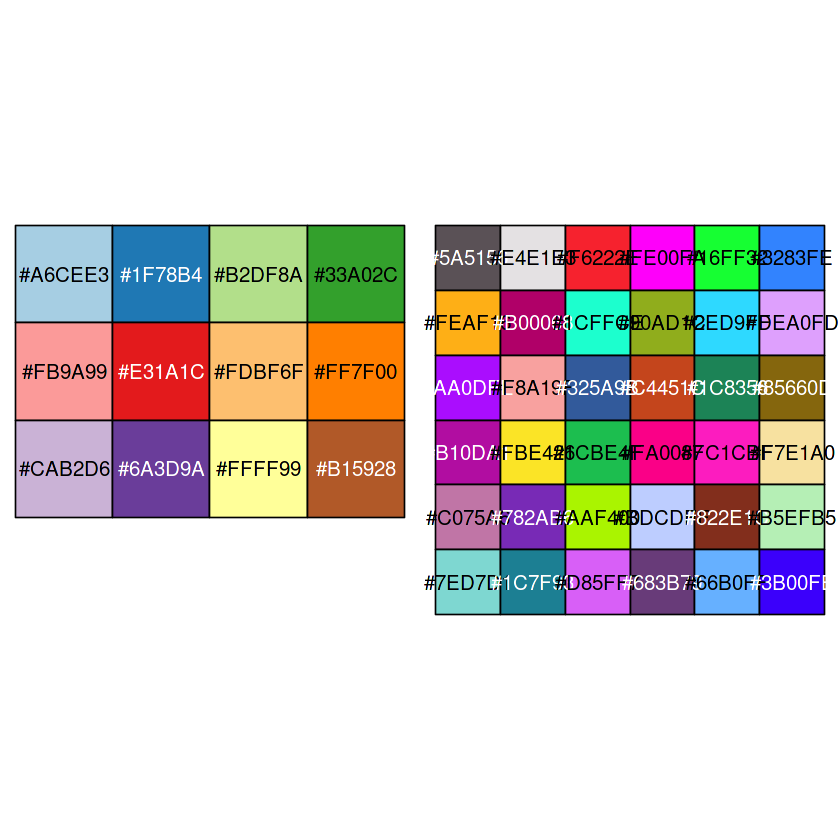

In [3]:
par(mfrow=c(1,2))
# method color
my_col_m <- brewer.pal(12, "Paired")
show_col(my_col_m)
# cell type color
my_col_c <- unlist(polychrome())
show_col(my_col_c)

In [69]:
dataset_ls <- c("Buenrostro_2018", "candidate1", "Cell_line_mixing", "Chen_2019",  "PBMC_multiomics") #"Ma_2019",
k_ls <- c(9, 13, 10, 13, 15)

# Read meta data file

In [84]:
i <- 1
dataset <- dataset_ls[i]
k_optimal <- k_ls[i]

In [85]:
df <- read.table(paste0("~/public/SiyuanLuo/projects/benchmark/outputs/", dataset, "/metric_file.tsv"), sep="\t", header=TRUE)

In [86]:
# df1 <- read.table("metric_file.tsv", sep="\t", header=TRUE)
# df2 <- read.table("Chen_2019/metric_file.tsv", sep="\t", header=TRUE)
# df <- rbind(df1, df2)
dim(df)
unique(df$resolution)

[1] 512  10

[1] 0.050 0.150 0.175 0.200 0.225 0.250 0.350 0.400 0.450 0.550 0.600 0.650
[13] 0.750 0.800 0.850 0.900

In [88]:
setwd(paste0("~/public/SiyuanLuo/projects/benchmark/outputs/", dataset))

In [ ]:
df$rds_file <- gsub("_metrics.tsv", "_evaluation.RDS", df$file)
df["clustering_file"] <- gsub("evaluation", "clustering", df$file)
df["clustering_file"] <- gsub("_metrics", "", df$clustering_file)
df["long_method"] <- paste(df$method, df$feature_type, df$distance, sep="_")
df$long_method <-gsub("_default","",as.character(df$long_method))
df$snn_file <- paste0(dirname(df$clustering_file), "/sobj_SNN.RDS")

In [35]:
head(df)

,file,scenario,workflow,method,feature_type,tile_size,distance,ndim,filename,resolution,rds_file,clustering_file,long_method,snn_file
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,Buenrostro_2018/evaluation/Signac/all_cell_peaks/0/default/15/r0.05_metrics.tsv,Buenrostro_2018,evaluation,Signac,all_cell_peaks,0,default,15,r0.05_metrics.tsv,0.050,Buenrostro_2018/evaluation/Signac/all_cell_peaks/0/default/15/r0.05_evaluation.RDS,Buenrostro_2018/clustering/Signac/all_cell_peaks/0/default/15/r0.05.tsv,Signac_all_cell_peaks,Buenrostro_2018/clustering/Signac/all_cell_peaks/0/default/15/sobj_SNN.RDS
2,Buenrostro_2018/evaluation/Signac/all_cell_peaks/0/default/15/r0.15_metrics.tsv,Buenrostro_2018,evaluation,Signac,all_cell_peaks,0,default,15,r0.15_metrics.tsv,0.150,Buenrostro_2018/evaluation/Signac/all_cell_peaks/0/default/15/r0.15_evaluation.RDS,Buenrostro_2018/clustering/Signac/all_cell_peaks/0/default/15/r0.15.tsv,Signac_all_cell_peaks,Buenrostro_2018/clustering/Signac/all_cell_peaks/0/default/15/sobj_SNN.RDS
3,Buenrostro_2018/evaluation/Signac/all_cell_peaks/0/default/15/r0.175_metrics.tsv,Buenrostro_2018,evaluation,Signac,all_cell_peaks,0,default,15,r0.175_metrics.tsv,0.175,Buenrostro_2018/evaluation/Signac/all_cell_peaks/0/default/15/r0.175_evaluation.RDS,Buenrostro_2018/clustering/Signac/all_cell_peaks/0/default/15/r0.175.tsv,Signac_all_cell_peaks,Buenrostro_2018/clustering/Signac/all_cell_peaks/0/default/15/sobj_SNN.RDS
4,Buenrostro_2018/evaluation/Signac/all_cell_peaks/0/default/15/r0.2_metrics.tsv,Buenrostro_2018,evaluation,Signac,all_cell_peaks,0,default,15,r0.2_metrics.tsv,0.200,Buenrostro_2018/evaluation/Signac/all_cell_peaks/0/default/15/r0.2_evaluation.RDS,Buenrostro_2018/clustering/Signac/all_cell_peaks/0/default/15/r0.2.tsv,Signac_all_cell_peaks,Buenrostro_2018/clustering/Signac/all_cell_peaks/0/default/15/sobj_SNN.RDS
5,Buenrostro_2018/evaluation/Signac/all_cell_peaks/0/default/15/r0.225_metrics.tsv,Buenrostro_2018,evaluation,Signac,all_cell_peaks,0,default,15,r0.225_metrics.tsv,0.225,Buenrostro_2018/evaluation/Signac/all_cell_peaks/0/default/15/r0.225_evaluation.RDS,Buenrostro_2018/clustering/Signac/all_cell_peaks/0/default/15/r0.225.tsv,Signac_all_cell_peaks,Buenrostro_2018/clustering/Signac/all_cell_peaks/0/default/15/sobj_SNN.RDS
6,Buenrostro_2018/evaluation/Signac/all_cell_peaks/0/default/15/r0.25_metrics.tsv,Buenrostro_2018,evaluation,Signac,all_cell_peaks,0,default,15,r0.25_metrics.tsv,0.250,Buenrostro_2018/evaluation/Signac/all_cell_peaks/0/default/15/r0.25_evaluation.RDS,Buenrostro_2018/clustering/Signac/all_cell_peaks/0/default/15/r0.25.tsv,Signac_all_cell_peaks,Buenrostro_2018/clustering/Signac/all_cell_peaks/0/default/15/sobj_SNN.RDS


In [23]:
df$n_clusters <- 0
for (i in 1:length(df$clustering_file)){
    clusterings <- read.table(df$clustering_file[i])
    df[i, "n_clusters"] <- max(clusterings$clusterings)
}

In [24]:
df_metrics <- data.frame(matrix(ncol = 13, nrow = 0))
colnames(df_metrics) <- c("n_clusters","metric","value","method",
                          "long_method","feature_type","tile_size",
                          "distance","ndim","resolution","rds_file", 
                          "clustering_file", "snn_file")

In [25]:
j <- 1
for(i in 1:dim(df)[1]){
    file <- df$file[i]
    df_metric <- read.table(df$file[i], sep="\t", header=TRUE)
    for(metric in rownames(df_metric)){
        df_metrics[j, "metric"] <- metric
        df_metrics[j, "value"] <- df_metric[metric, "value"]
        df_metrics[j ,c("n_clusters","method","feature_type","tile_size","distance","ndim","resolution", 
                        "long_method", "rds_file", "clustering_file", "snn_file")] <- df[i, c("n_clusters","method","feature_type",
                                                                                              "tile_size","distance","ndim","resolution",
                                                                                              "long_method", "rds_file", "clustering_file", 
                                                                                              "snn_file")]
        j <- j+1
    }
    }

In [26]:
df_metrics$resolution <- as.numeric(df_metrics$resolution)

# Recalculate ARI2, AW2, AV2 if necessary

In [37]:
df_ari2 <- df_metrics[df_metrics$metric=="ARI",]
df_ari2$metric <- "ARI2"
df_aw2 <- df_metrics[df_metrics$metric=="ARI",]
df_aw2$metric <- "AW2"
df_av2 <- df_metrics[df_metrics$metric=="ARI",]
df_av2$metric <- "AV2"

In [57]:
for (i in 1:dim(df)[1]) {
    clustering_file <- df[i, "clustering_file"]
    df_clustering <-  read.table(file = clustering_file, sep = "\t")
    rownames(df_clustering) <- df_clustering$barcode
    
    input <- df[i,"snn_file"]
    sobj <- readRDS(input)
    true_labels <- sobj$ground_truth

    clustering <- unlist(lapply(Cells(sobj), function(x){df_clustering[x, "clusterings"]}))
    res <- adjusted_wallance_indices(true_labels, clustering)
    awi <- res$Awi
    avj <- res$Avj
    aw2 <- mean(unlist(awi[!is.na(awi)]))
    av2 <- mean(unlist(awi[!is.na(avj)]))
    ari2 <- 2*aw2*av2/(aw2+av2)
    df_ari2[i, "value"] <- ari2
    df_aw2[i, "value"] <- aw2
    df_av2[i, "value"] <- av2
}

In [58]:
df_metrics <-  subset(df_metrics, metric != "ARI2")
df_metrics <-  subset(df_metrics, metric != "AW2")
df_metrics <-  subset(df_metrics, metric != "AV2")
df_metrics <- rbind(df_metrics, df_ari2, df_aw2, df_av2)
dim(df_metrics)

[1] 6656   13

In [59]:
write.table(df, file = "meta_info_for_evaluation.tsv", sep = "\t", quote = FALSE)
write.table(df_metrics, file = "metrics_value.tsv", sep = "\t", quote = FALSE)

In [89]:
df <- read.table(file="meta_info_for_evaluation.tsv", sep="\t", header=TRUE)
df_metrics <- read.table(file="metrics_value.tsv", sep="\t", header=TRUE)

# Changes across different ndim

**For each method and the optimal k settings, check how the performance changes when ndim changes**

In [60]:
library(aricode)
library(tidyr)

In [90]:
df_metrics$n_clusters_d <- abs(df_metrics$n_clusters - k_optimal)

In [91]:
df_metrics_optimal_k <- df_metrics  %>%
  group_by(long_method, ndim) %>%
  filter(n_clusters_d == min(n_clusters_d))  %>%
  ungroup()

**The number of clusters increase dramatically when ndim increase.**

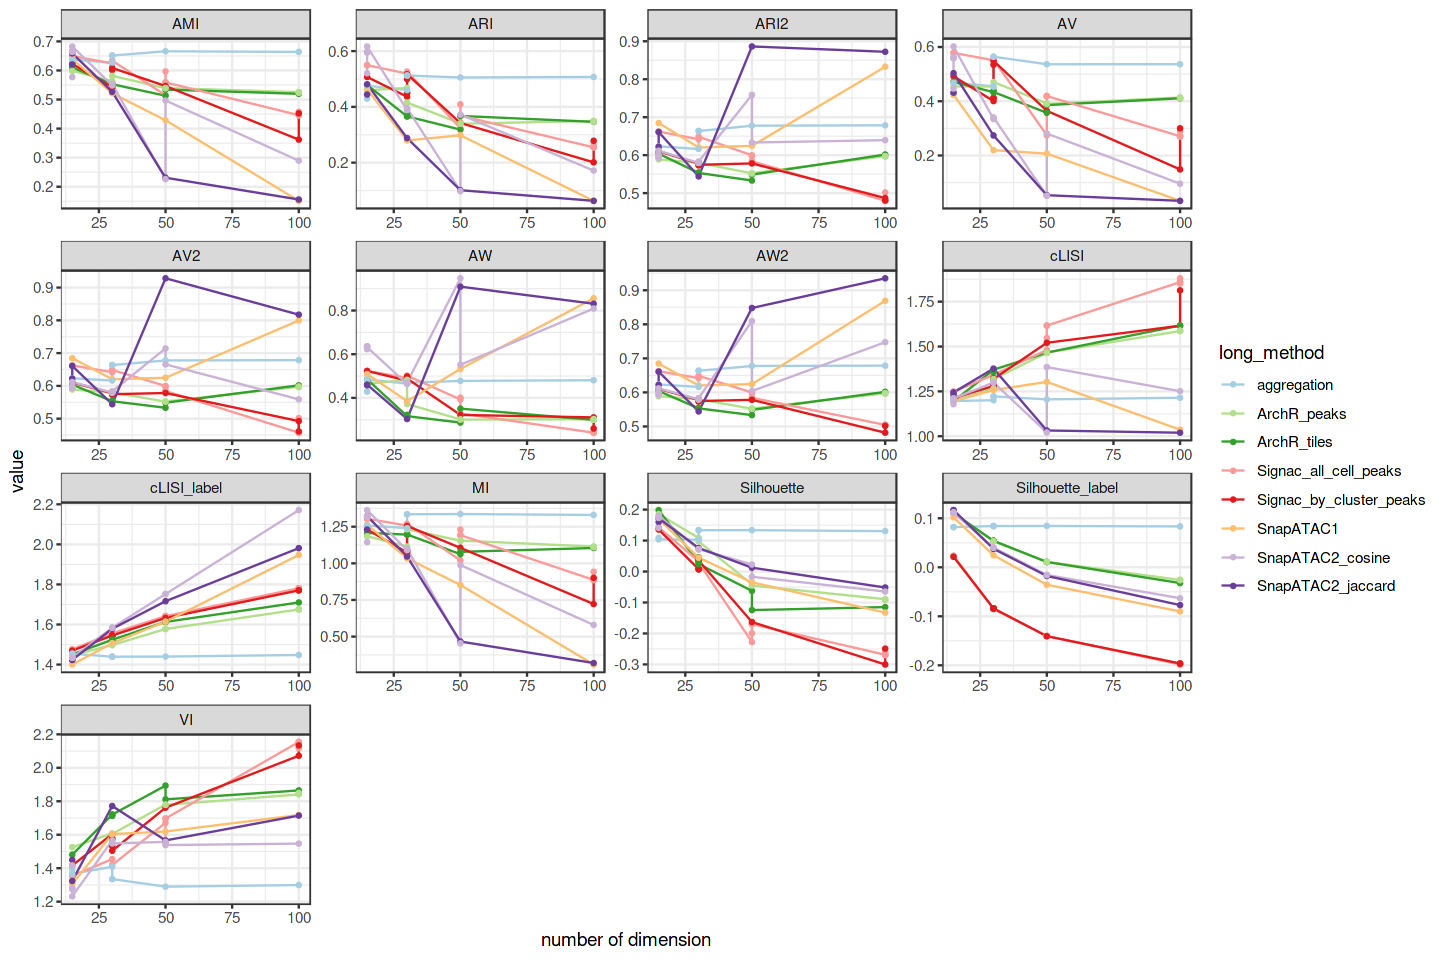

In [92]:
options(repr.plot.width=12, repr.plot.height=8)
p1 <-
df_metrics_optimal_k %>% 
  ggplot(aes(x=ndim, y=value, color=long_method)) + 
  geom_line(size=0.5) + 
  geom_point(size=0.8) +
  facet_wrap(~metric, scales = "free") + 
  xlab("number of dimension") +
  ylab("value") +
  # geom_vline(xintercept=0.8, linetype="dashed", color = "grey") +
  theme_bw() +
  scale_colour_manual(values = brewer.pal(10, "Paired")[c(1,3:6,7,9:10)])
p1

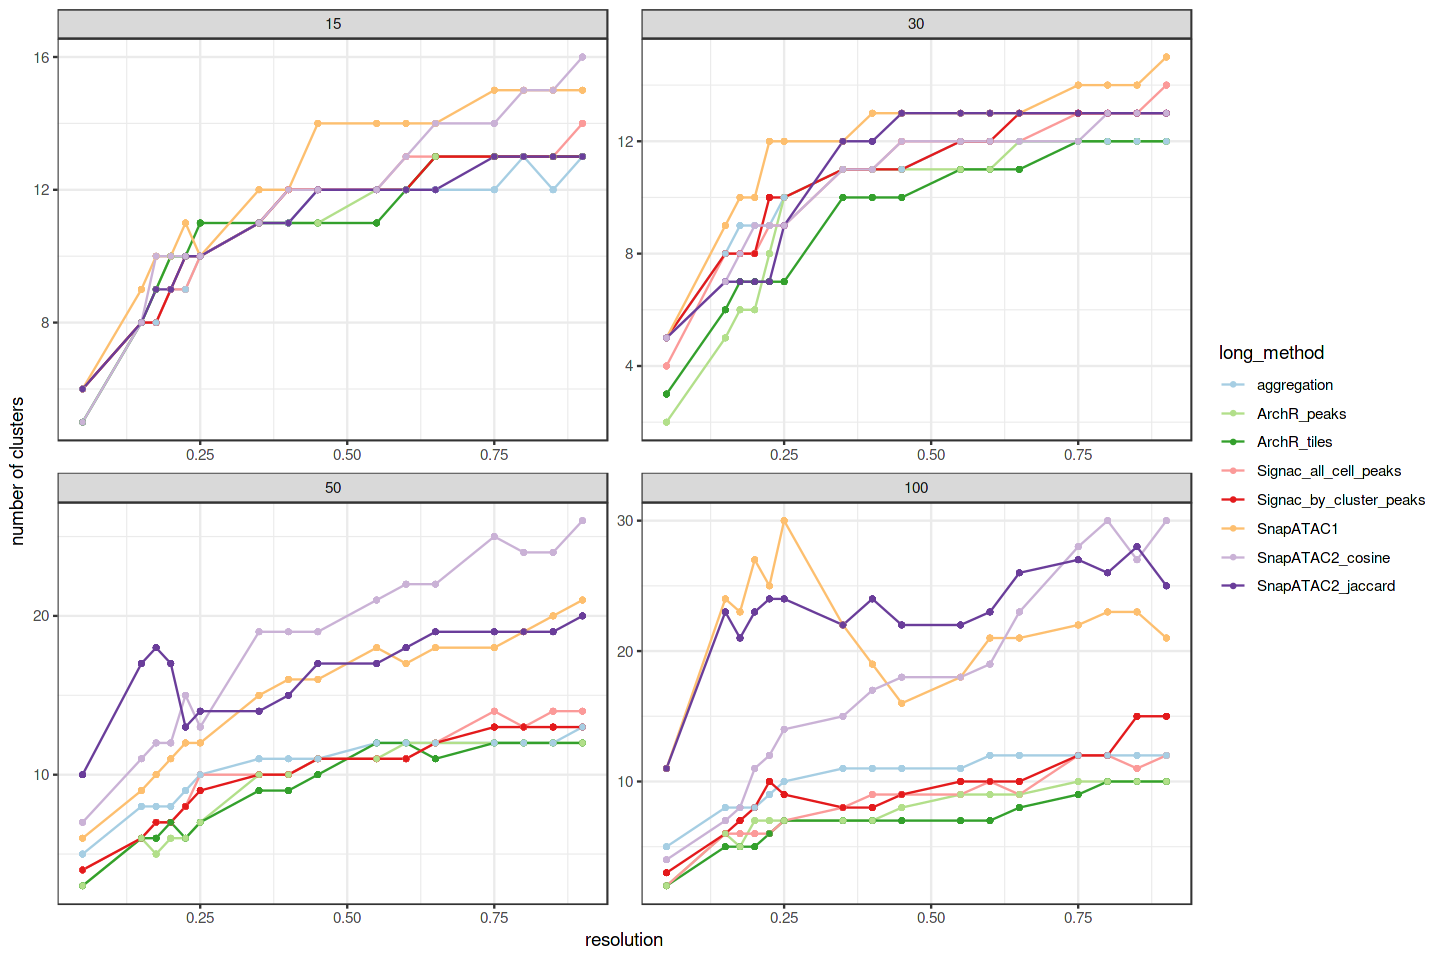

In [93]:
options(repr.plot.width=12, repr.plot.height=8)
p2 <- df_metrics %>% 
# filter(grepl(n,ndim)) %>% 
  ggplot(aes(x=resolution, y=n_clusters, color=long_method)) + 
  geom_line(size=0.5) + 
  geom_point(size=0.8) +
  facet_wrap(~ndim, scales = "free") + 
  xlab("resolution") +
  ylab("number of clusters") +
  # geom_vline(xintercept=0.8, linetype="dashed", color = "grey") +
  theme_bw() +
  scale_colour_manual(values = brewer.pal(10, "Paired")[c(1,3:6,7,9:10)]) 
  # +
  # ylim(0, 25)
p2

### Use ARI, ARI2 only

In [94]:
df_metrics_external <- df_metrics[as.logical(df_metrics$metric %in% c("ARI", "AW", "AV", "AMI", "MI", "VI", "ARI2", "AW2", 'AV2')),]

In [95]:
df_metrics_ari <- df_metrics_external %>% filter(metric == "ARI" | metric == "ARI2") %>% mutate(group = paste(metric, ndim, sep="-"))
df_metrics_ari$group <- factor(df_metrics_ari$group, levels = c("ARI-15", "ARI-30", "ARI-50","ARI-100","ARI2-15","ARI2-30","ARI2-50","ARI2-100"))

Warning message:
“Removed 10 rows containing missing values (`geom_point()`).”


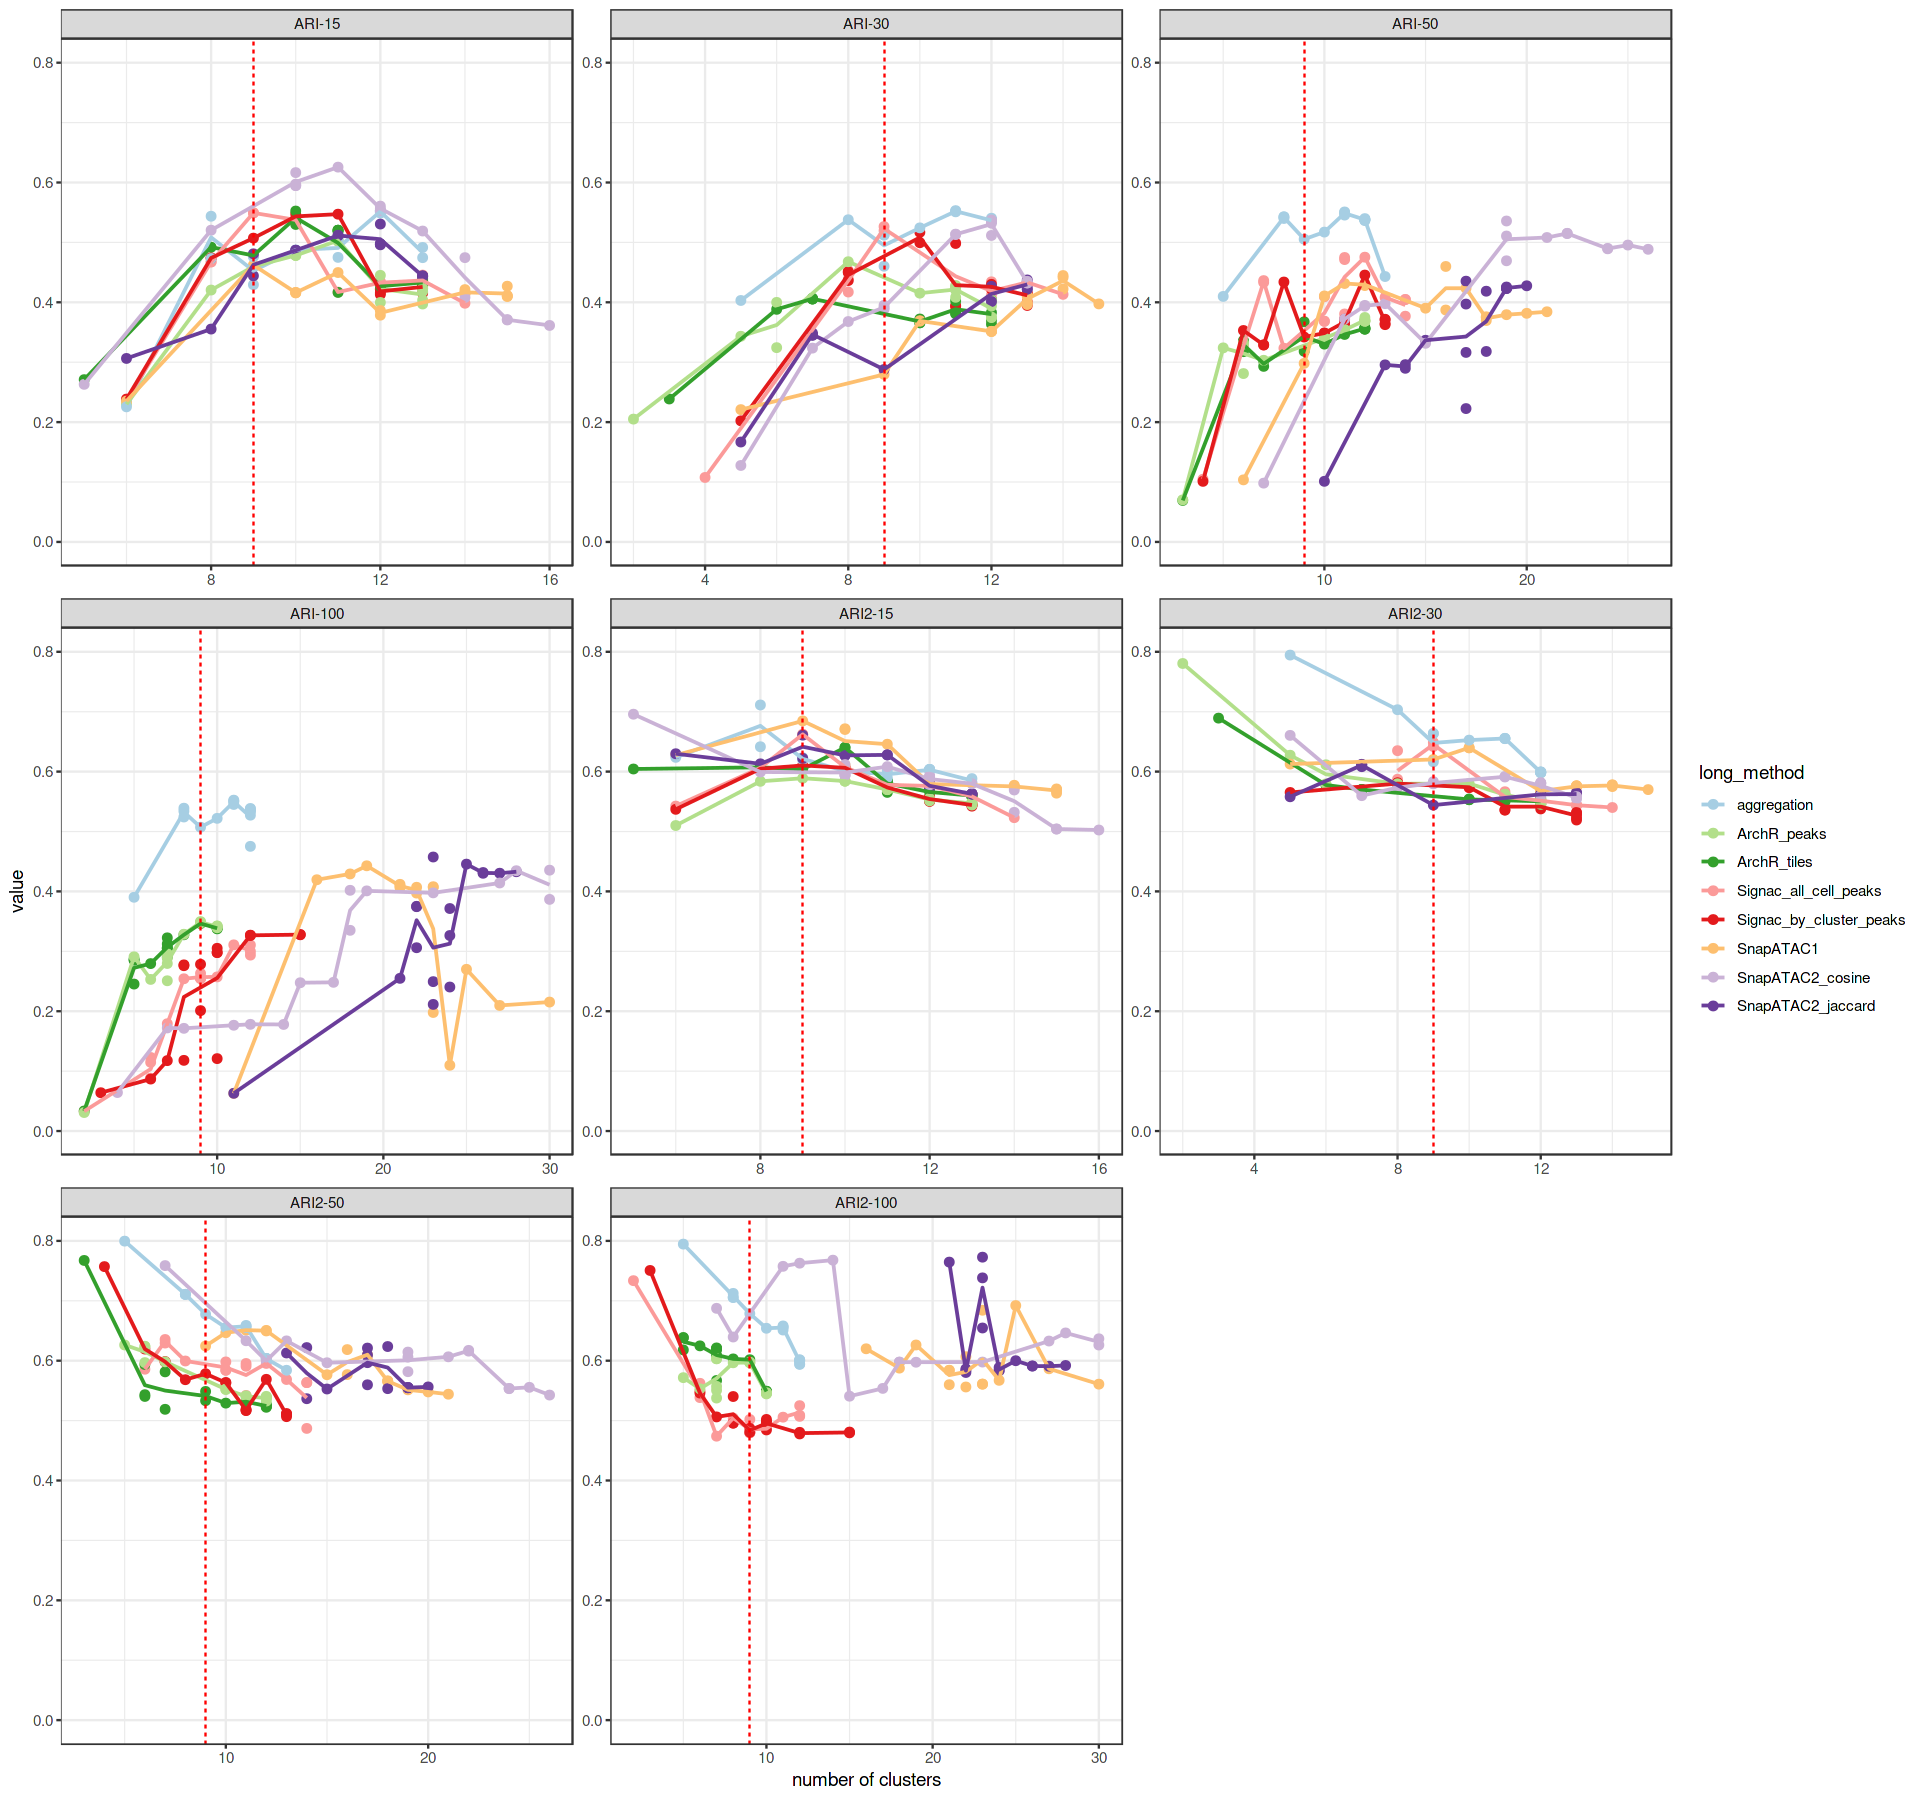

In [96]:
options(repr.plot.width=16, repr.plot.height=15)


# line plot (fix ndim=50)
p3 <-
df_metrics_ari %>% filter(n_clusters <= 30) %>% #filter(long_method=="SnapATAC2_cosine") %>% #filter(grepl(n,ndim)) %>%
  group_by(long_method, metric, n_clusters, ndim) %>%
  mutate(mean_value = mean(value)) %>%
  ggplot(aes(x=n_clusters, y=value, color=long_method)) + 
  geom_point(size=2) +
  geom_line(size=0.8, aes(x=n_clusters, y=mean_value, color=long_method)) + 
  facet_wrap(~group, scales = "free") + 
  xlab("number of clusters") +
  ylab("value") +
  geom_vline(xintercept=k_optimal, color = "red", linetype = "dashed") +
  theme_bw() +
  # geom_errorbar(aes(ymin = min_value, ymax = max_value), width = 0.2, linetype = "dashed") +
  scale_colour_manual(values = brewer.pal(10, "Paired")[c(1,3:6,7,9:10)]) + ylim(0, 0.8)
p3

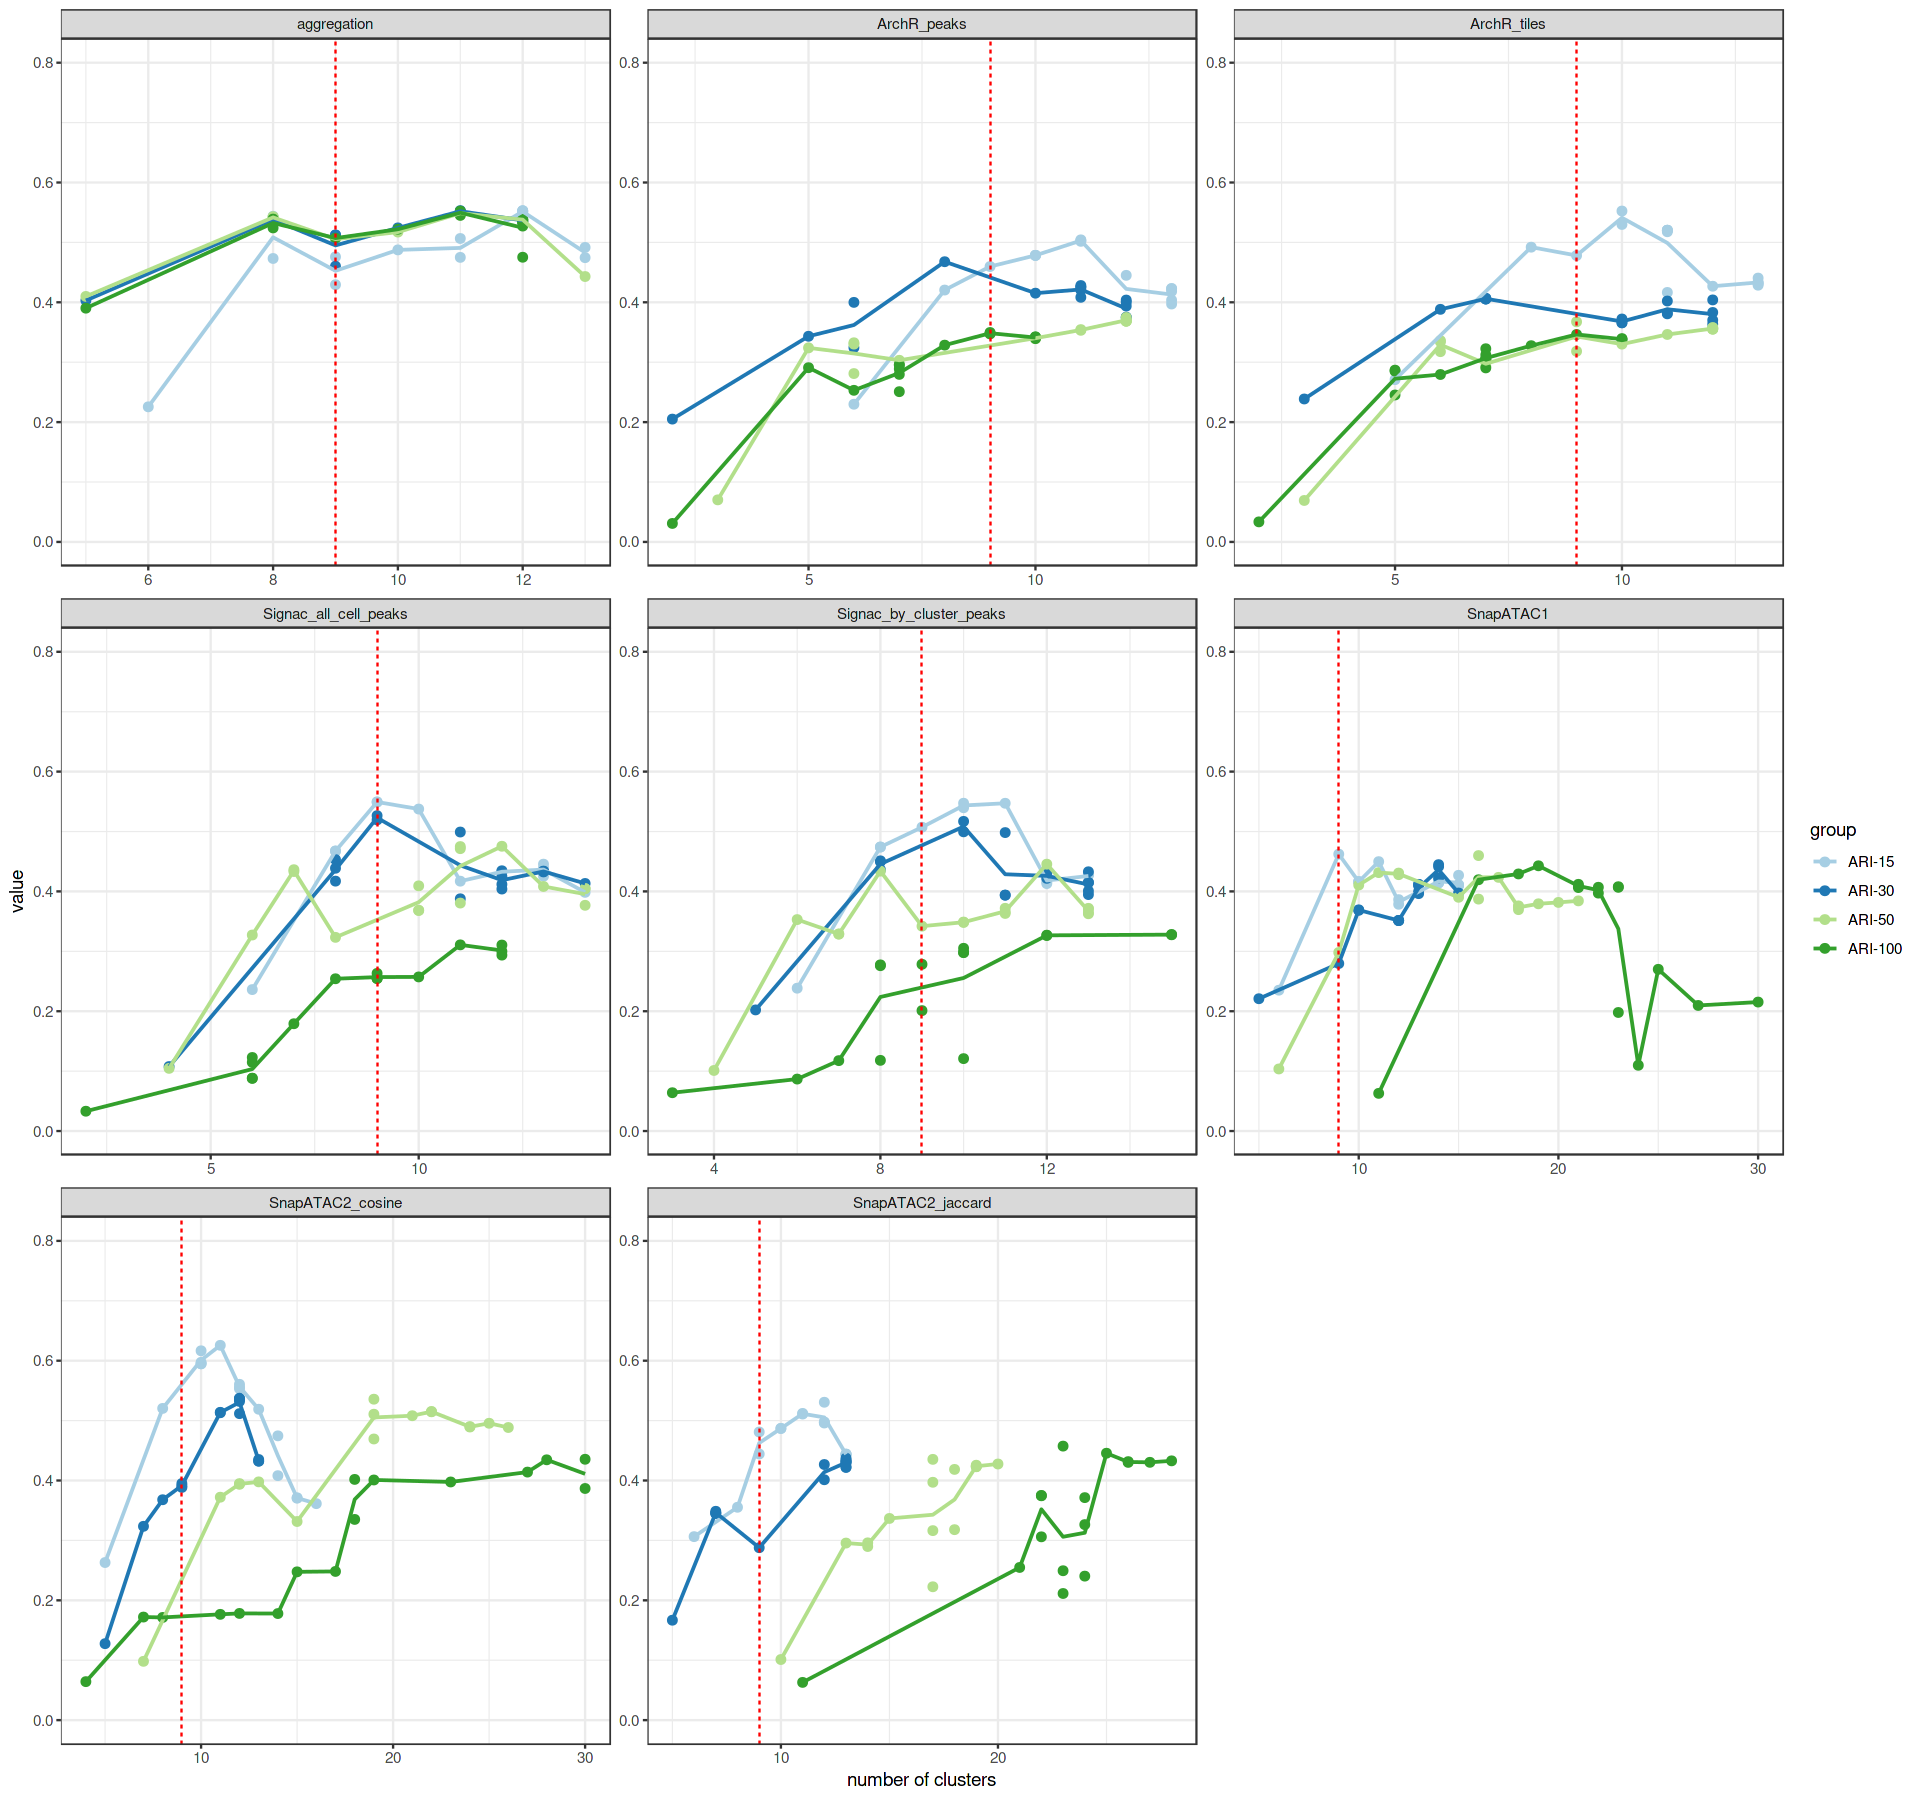

In [97]:
options(repr.plot.width=16, repr.plot.height=15)


# line plot (fix ndim=50)
p4 <-
df_metrics_ari %>% filter(n_clusters <= 30) %>% filter(metric=="ARI") %>% #filter(grepl(n,ndim)) %>%
  group_by(long_method, metric, n_clusters, ndim) %>%
  mutate(mean_value = mean(value)) %>%
  ggplot(aes(x=n_clusters, y=value, color=group)) + 
  geom_point(size=2) +
  geom_line(size=0.8, aes(x=n_clusters, y=mean_value, color=group)) + 
  facet_wrap(~long_method, scales = "free") + 
  xlab("number of clusters") +
  ylab("value") +
  geom_vline(xintercept=k_optimal, color = "red", linetype = "dashed") +
  theme_bw() +
  # geom_errorbar(aes(ymin = min_value, ymax = max_value), width = 0.2, linetype = "dashed") +
  scale_colour_manual(values = brewer.pal(10, "Paired")) + ylim(0, 0.8)
p4

# For all datasets, get the above 4 plots

In [81]:
get_df <- function(dataset){
    df <- read.table(paste0("~/public/SiyuanLuo/projects/benchmark/outputs/", dataset, "/metric_file.tsv"), sep="\t", header=TRUE)
    setwd(paste0("~/public/SiyuanLuo/projects/benchmark/outputs/", dataset))

    df$rds_file <- gsub("_metrics.tsv", "_evaluation.RDS", df$file)
    df["clustering_file"] <- gsub("evaluation", "clustering", df$file)
    df["clustering_file"] <- gsub("_metrics", "", df$clustering_file)
    df["long_method"] <- paste(df$method, df$feature_type, df$distance, sep="_")
    df$long_method <-gsub("_default","",as.character(df$long_method))
    df$snn_file <- paste0(dirname(df$clustering_file), "/sobj_SNN.RDS")

    df$n_clusters <- 0
    for (i in 1:length(df$clustering_file)){
        clusterings <- read.table(df$clustering_file[i])
        df[i, "n_clusters"] <- max(clusterings$clusterings)
    }
    df_metrics <- data.frame(matrix(ncol = 13, nrow = 0))
    colnames(df_metrics) <- c("n_clusters","metric","value","method",
                            "long_method","feature_type","tile_size",
                            "distance","ndim","resolution","rds_file", 
                            "clustering_file", "snn_file")

    j <- 1
    for(i in 1:dim(df)[1]){
        file <- df$file[i]
        df_metric <- read.table(df$file[i], sep="\t", header=TRUE)
        for(metric in rownames(df_metric)){
            df_metrics[j, "metric"] <- metric
            df_metrics[j, "value"] <- df_metric[metric, "value"]
            df_metrics[j ,c("n_clusters","method","feature_type","tile_size","distance","ndim","resolution", 
                            "long_method", "rds_file", "clustering_file", "snn_file")] <- df[i, c("n_clusters","method","feature_type",
                                                                                                "tile_size","distance","ndim","resolution",
                                                                                                "long_method", "rds_file", "clustering_file", 
                                                                                                "snn_file")]
            j <- j+1
        }
    }

    df_metrics$resolution <- as.numeric(df_metrics$resolution)
    return(list(df=df, df_metrics=df_metrics))
}

In [82]:
add_ari2 <- function(df, df_metrics){
    df_ari2 <- df_metrics[df_metrics$metric=="ARI",]
    df_ari2$metric <- "ARI2"
    df_aw2 <- df_metrics[df_metrics$metric=="ARI",]
    df_aw2$metric <- "AW2"
    df_av2 <- df_metrics[df_metrics$metric=="ARI",]
    df_av2$metric <- "AV2"


    for (i in 1:dim(df)[1]) {
        clustering_file <- df[i, "clustering_file"]
        df_clustering <-  read.table(file = clustering_file, sep = "\t")
        rownames(df_clustering) <- df_clustering$barcode
        
        input <- df[i,"snn_file"]
        sobj <- readRDS(input)
        true_labels <- sobj$ground_truth

        clustering <- unlist(lapply(Cells(sobj), function(x){df_clustering[x, "clusterings"]}))
        res <- adjusted_wallance_indices(true_labels, clustering)
        awi <- res$Awi
        avj <- res$Avj
        aw2 <- mean(unlist(awi[!is.na(awi)]))
        av2 <- mean(unlist(awi[!is.na(avj)]))
        ari2 <- 2*aw2*av2/(aw2+av2)
        df_ari2[i, "value"] <- ari2
        df_aw2[i, "value"] <- aw2
        df_av2[i, "value"] <- av2
    }

    df_metrics <-  subset(df_metrics, metric != "ARI2")
    df_metrics <-  subset(df_metrics, metric != "AW2")
    df_metrics <-  subset(df_metrics, metric != "AV2")
    df_metrics <- rbind(df_metrics, df_ari2, df_aw2, df_av2)

    return(df_metrics)
}

In [83]:
ndim_visualize <- function(dataset, df_metrics, k_optimal){
    df_metrics$n_clusters_d <- abs(df_metrics$n_clusters - k_optimal)
    df_metrics_optimal_k <- df_metrics  %>%
    group_by(long_method, ndim) %>%
    filter(n_clusters_d == min(n_clusters_d))  %>%
    ungroup()

    options(repr.plot.width=12, repr.plot.height=8)
    p1 <-
    df_metrics_optimal_k %>% 
    ggplot(aes(x=ndim, y=value, color=long_method)) + 
    geom_line(size=0.5) + 
    geom_point(size=0.8) +
    facet_wrap(~metric, scales = "free") + 
    xlab("number of dimension") +
    ylab("value") +
    # geom_vline(xintercept=0.8, linetype="dashed", color = "grey") +
    theme_bw() +
    scale_colour_manual(values = brewer.pal(10, "Paired")[c(1,3:6,7,9:10)])

    options(repr.plot.width=12, repr.plot.height=8)
    p2 <- df_metrics %>% 
    ggplot(aes(x=resolution, y=n_clusters, color=long_method)) + 
    geom_line(size=0.5) + 
    geom_point(size=0.8) +
    facet_wrap(~ndim, scales = "free") + 
    xlab("resolution") +
    ylab("number of clusters") +
    theme_bw() +
    scale_colour_manual(values = brewer.pal(10, "Paired")[c(1,3:6,7,9:10)]) 


    df_metrics_ari <- df_metrics %>% filter(metric == "ARI" | metric == "ARI2") %>% mutate(group = paste(metric, ndim, sep="-"))
    df_metrics_ari$group <- factor(df_metrics_ari$group, levels = c("ARI-15", "ARI-30", "ARI-50","ARI-100","ARI2-15","ARI2-30","ARI2-50","ARI2-100"))

    options(repr.plot.width=16, repr.plot.height=15)

    p3 <-
    df_metrics_ari %>% filter(n_clusters <= 30) %>% 
    group_by(long_method, metric, n_clusters, ndim) %>%
    mutate(mean_value = mean(value)) %>%
    ggplot(aes(x=n_clusters, y=value, color=long_method)) + 
    geom_point(size=2) +
    geom_line(size=0.8, aes(x=n_clusters, y=mean_value, color=long_method)) + 
    facet_wrap(~group, scales = "free") + 
    xlab("number of clusters") +
    ylab("value") +
    geom_vline(xintercept=k_optimal, color = "red", linetype = "dashed") +
    theme_bw() +
    scale_colour_manual(values = brewer.pal(10, "Paired")[c(1,3:6,7,9:10)]) + ylim(0, 0.8)

    options(repr.plot.width=16, repr.plot.height=15)

    p4 <-
    df_metrics_ari %>% filter(n_clusters <= 30) %>% filter(metric=="ARI") %>% #filter(grepl(n,ndim)) %>%
    group_by(long_method, metric, n_clusters, ndim) %>%
    mutate(mean_value = mean(value)) %>%
    ggplot(aes(x=n_clusters, y=value, color=group)) + 
    geom_point(size=2) +
    geom_line(size=0.8, aes(x=n_clusters, y=mean_value, color=group)) + 
    facet_wrap(~long_method, scales = "free") + 
    xlab("number of clusters") +
    ylab("value") +
    geom_vline(xintercept=k_optimal, color = "red", linetype = "dashed") +
    theme_bw() +
    # geom_errorbar(aes(ymin = min_value, ymax = max_value), width = 0.2, linetype = "dashed") +
    scale_colour_manual(values = brewer.pal(10, "Paired")) + ylim(0, 0.8)

    pdf(paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/scripts/analysis/ndim_", dataset, ".pdf"), width=12, height=8)
    print(p1)
    print(p2)
    print(p3)
    print(p4)
    graphics.off()
}


In [100]:
dataset_ls <- c("Buenrostro_2018", "candidate1", "Cell_line_mixing", "Chen_2019",  "PBMC_multiomics") #"Ma_2019",
k_ls <- c(9, 13, 10, 13, 15)

In [101]:
for(i in c(2,3,5)){
    ls <- get_df(dataset)
    df <- ls$df
    df_metrics <- ls$df_metrics
    df_metrics <- add_ari2(df, df_metrics)
    ndim_visualize(dataset, df_metrics, k_optimal)
}